In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# pd.options.display.float_format = '{:.8f}'.format

## Часть 1. EDA
1. Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [2]:
df = pd.read_csv('./data/data.csv', index_col=0)

2. Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [6]:
# Удалим последний столбец с null-значениями
df = df.drop('Unnamed: 32', axis=1)

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


3. Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

Распределение целевой переменной

Number of Benign    : 357
Number of Malignant : 212


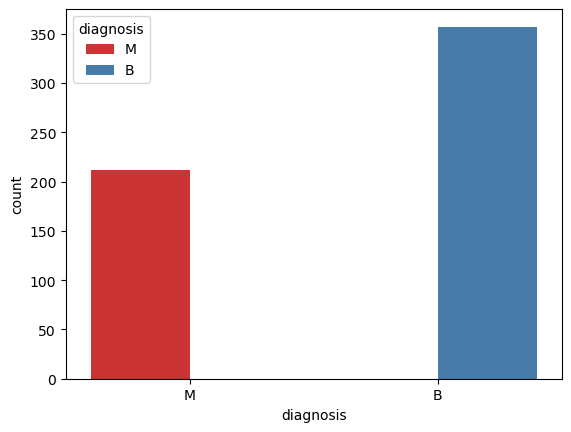

In [8]:
B, M = df.value_counts(subset='diagnosis')
print(f'Number of Benign    : {B}')
print(f'Number of Malignant : {M}')
sns.countplot(x='diagnosis', hue='diagnosis', palette='Set1', data=df)
plt.show()

In [9]:
# Для дальнейшей работы, преобразуем целевую переменную в численный вид
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [10]:
col_list = df.columns

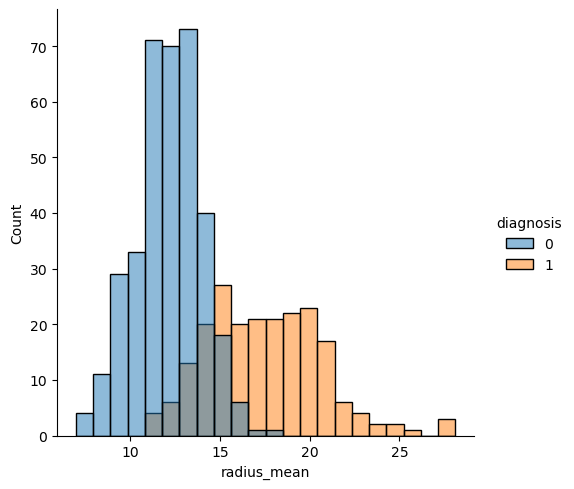

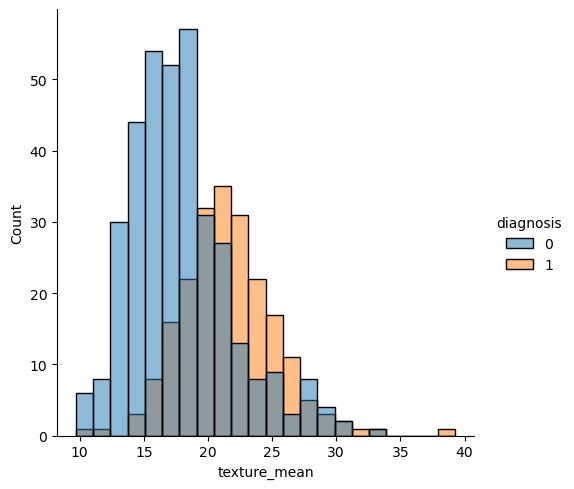

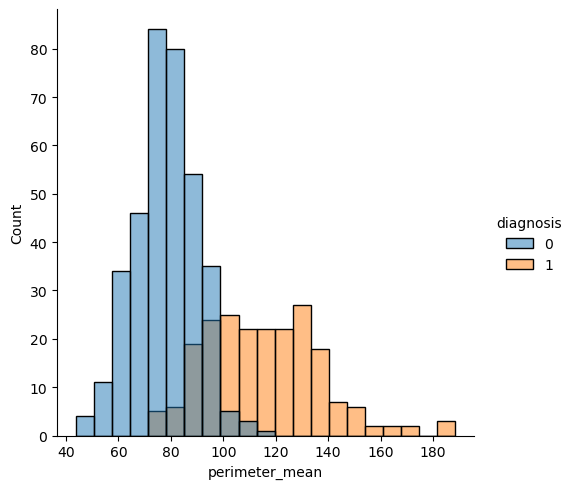

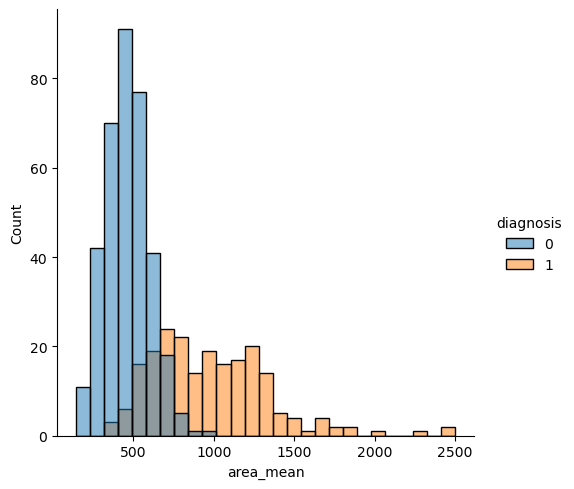

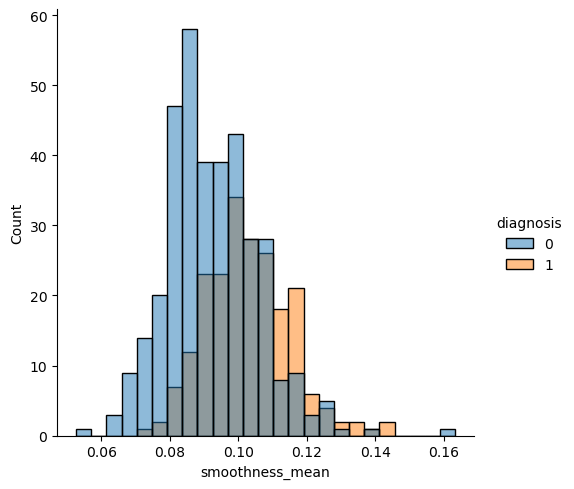

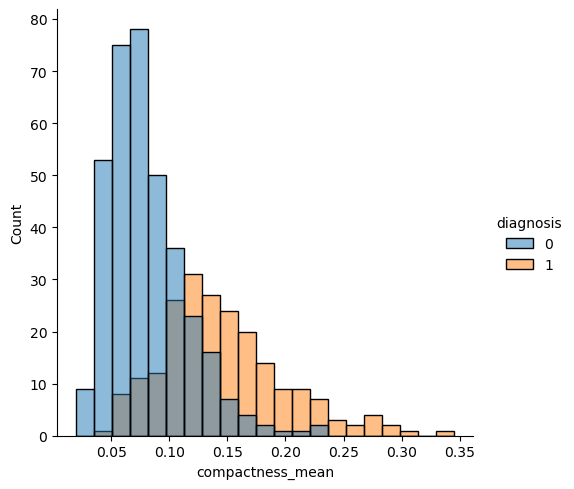

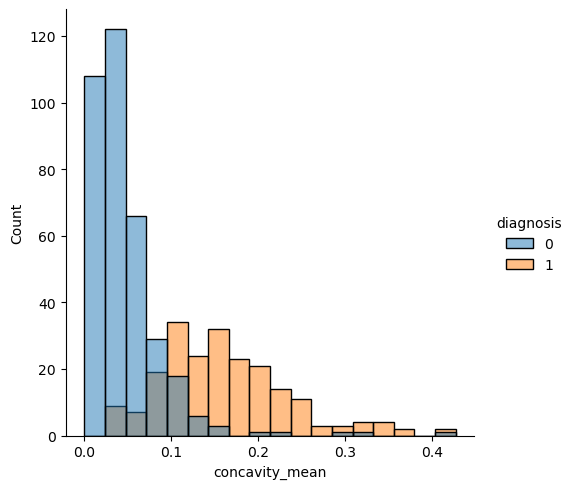

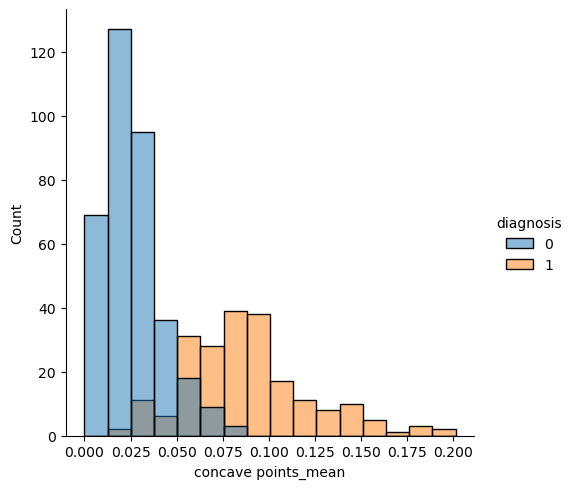

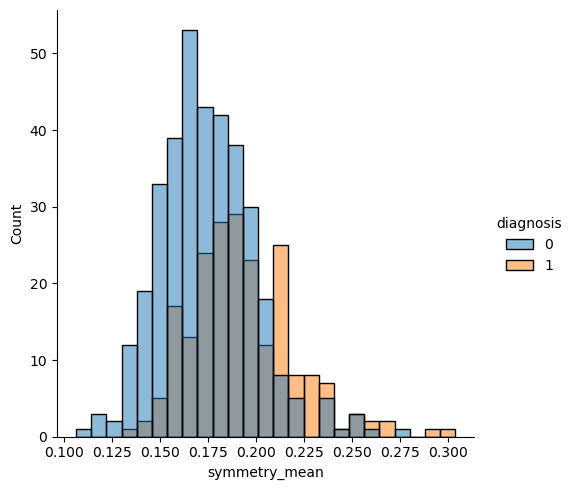

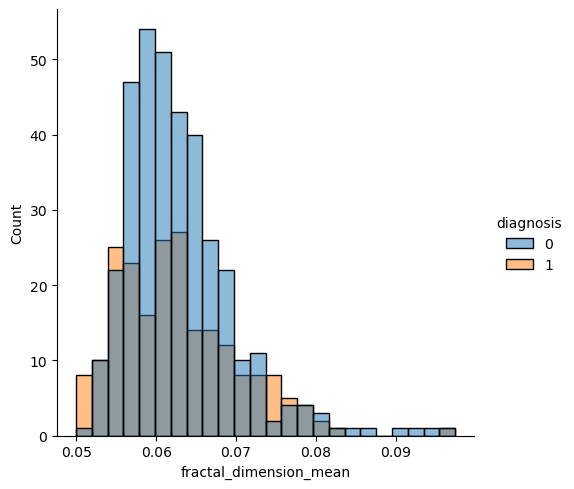

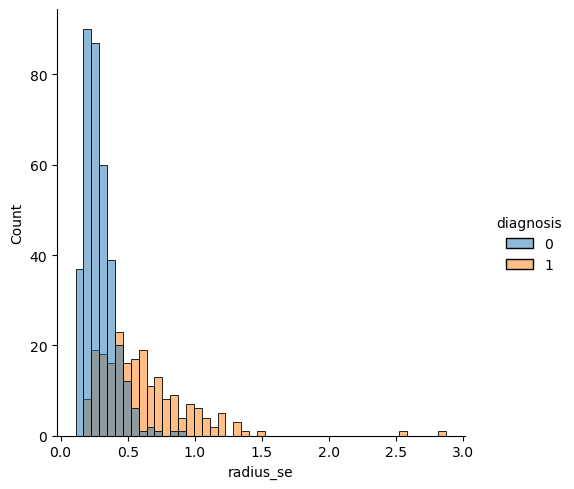

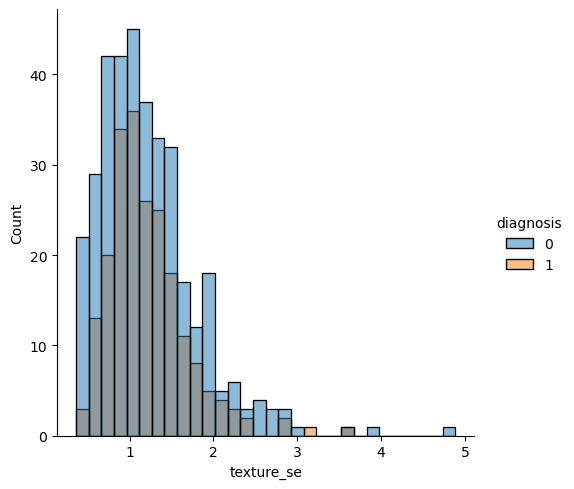

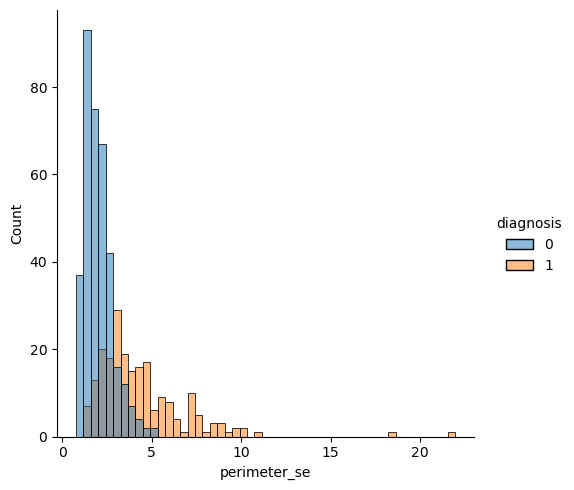

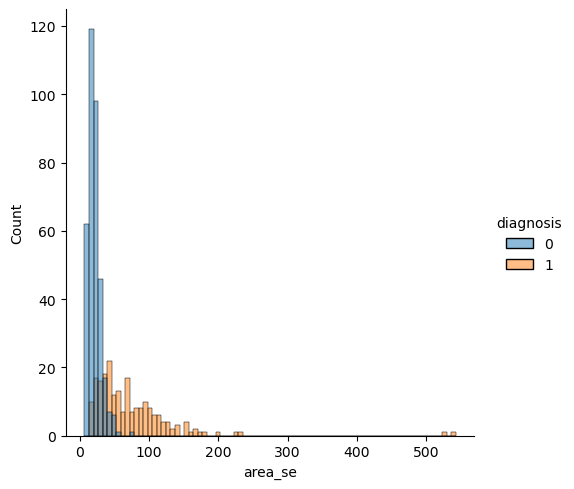

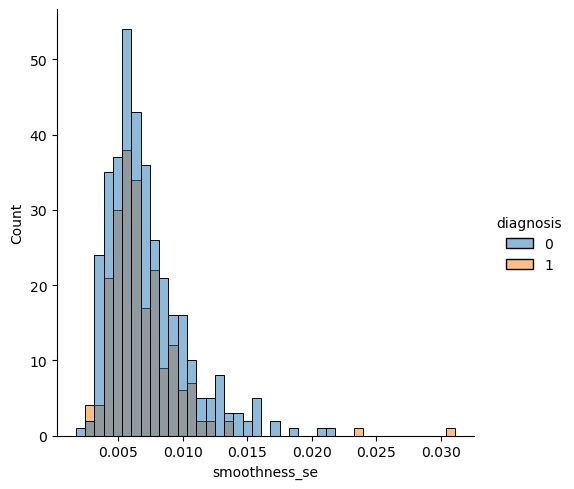

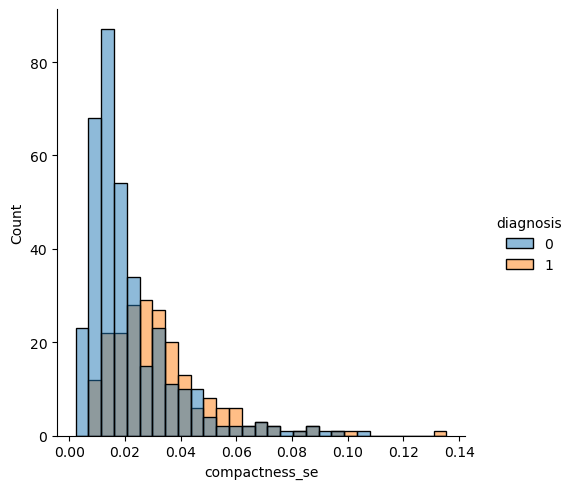

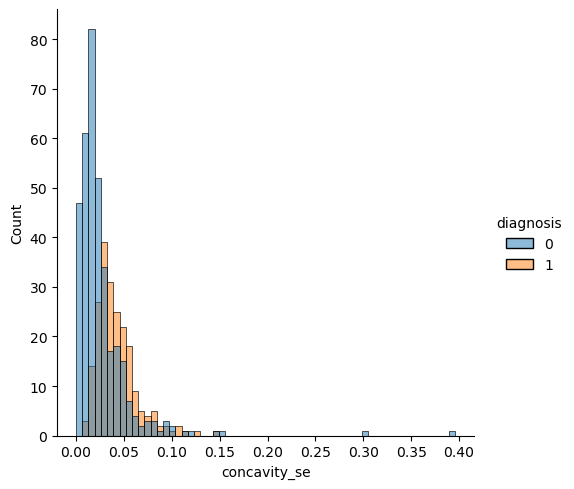

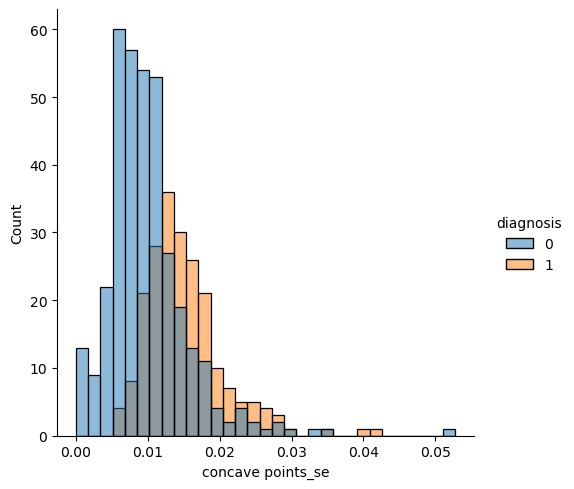

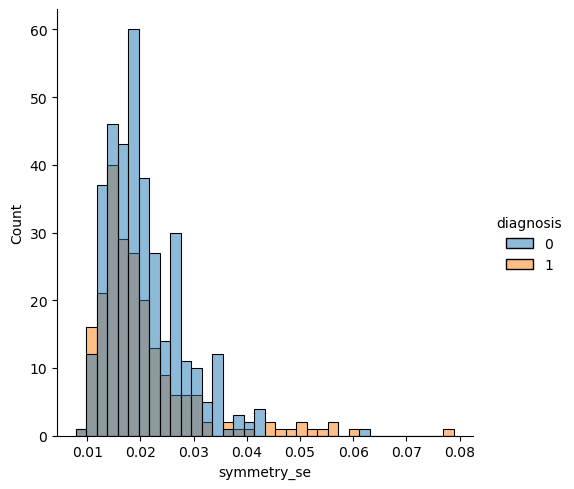

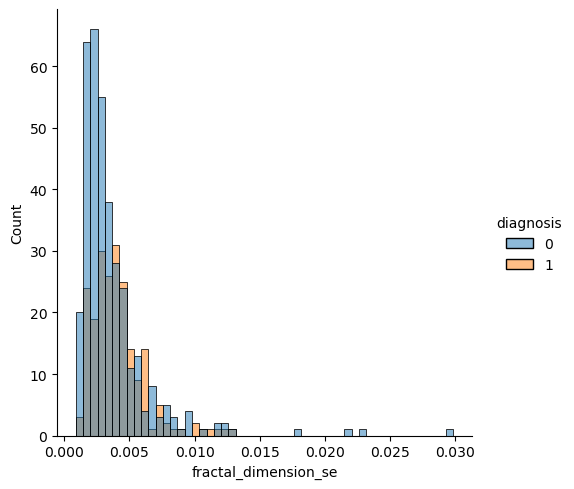

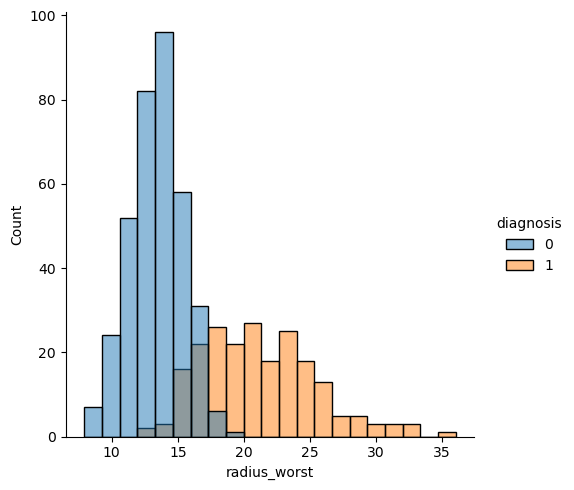

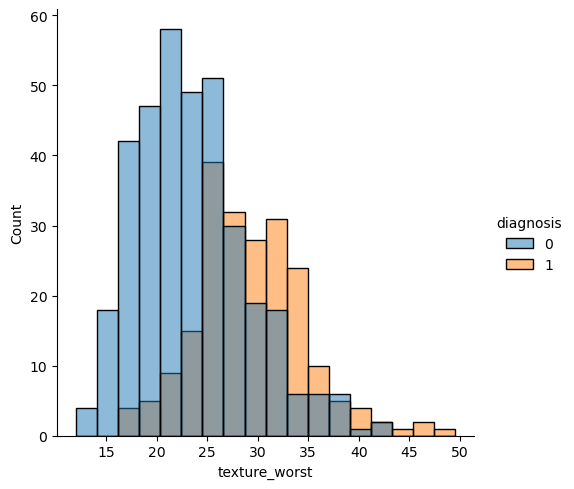

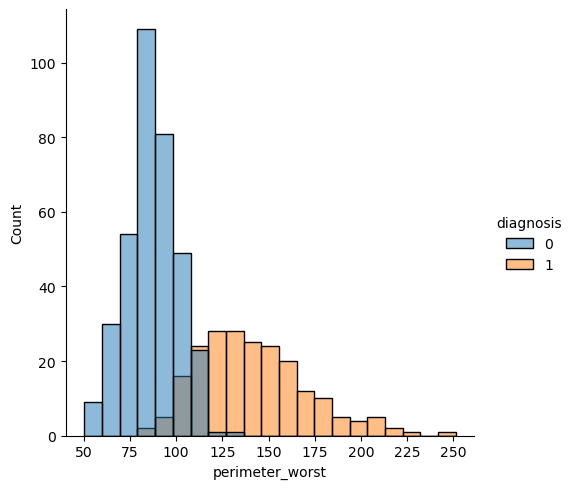

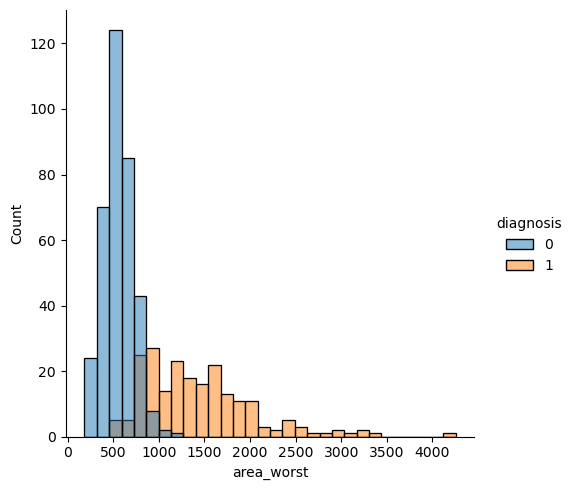

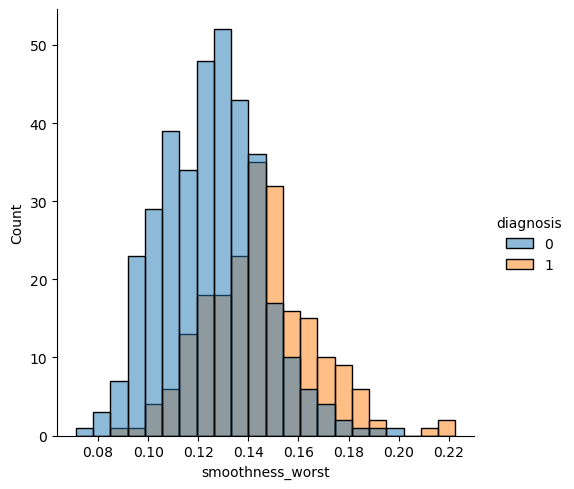

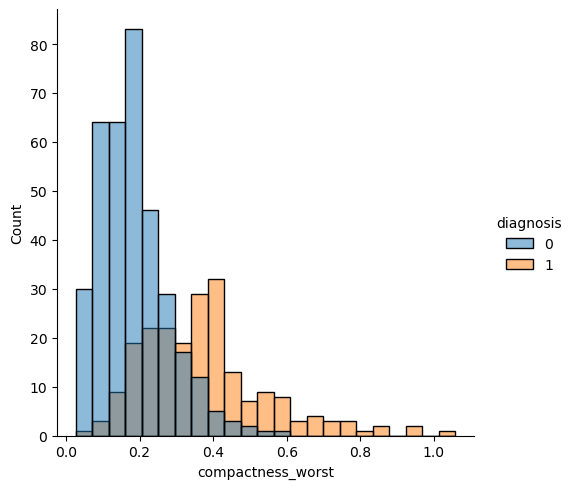

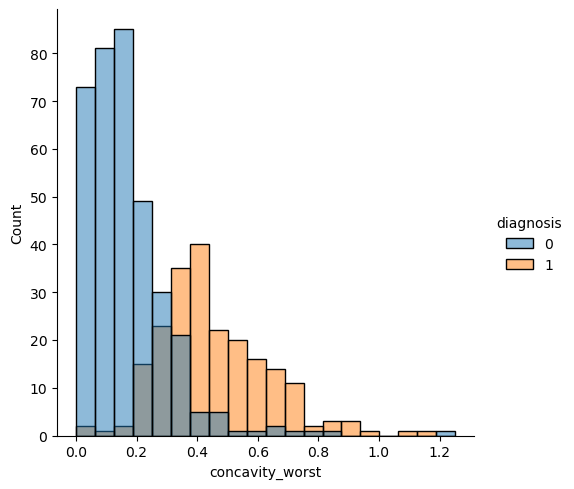

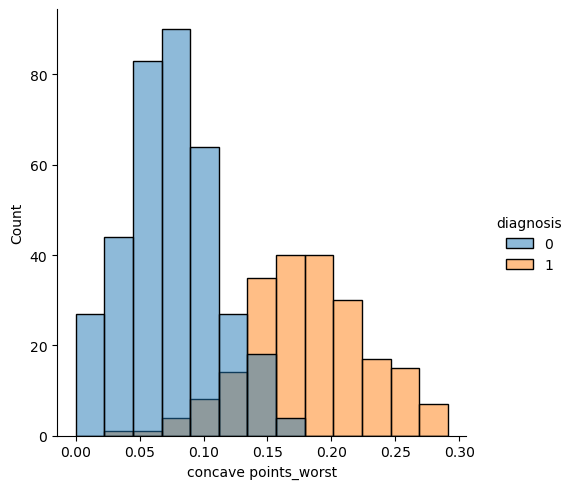

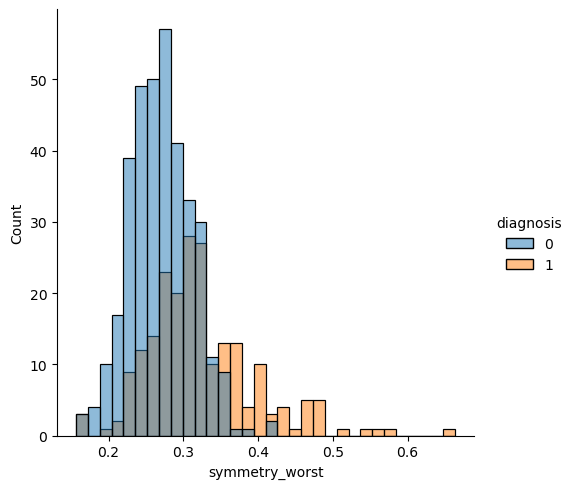

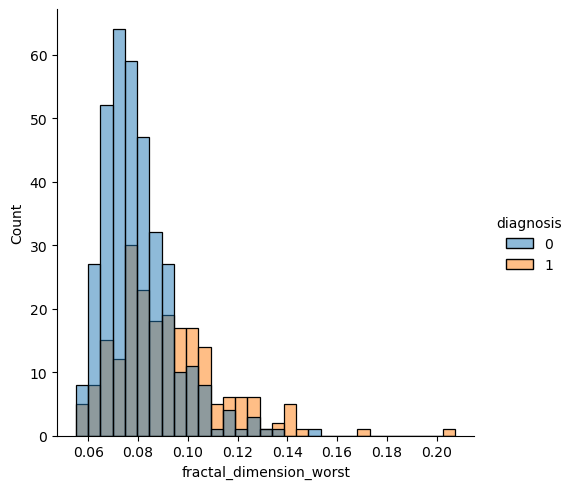

In [11]:
for col in col_list[1:]:
    sns.displot(data=df, x=col, hue='diagnosis')

4. Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

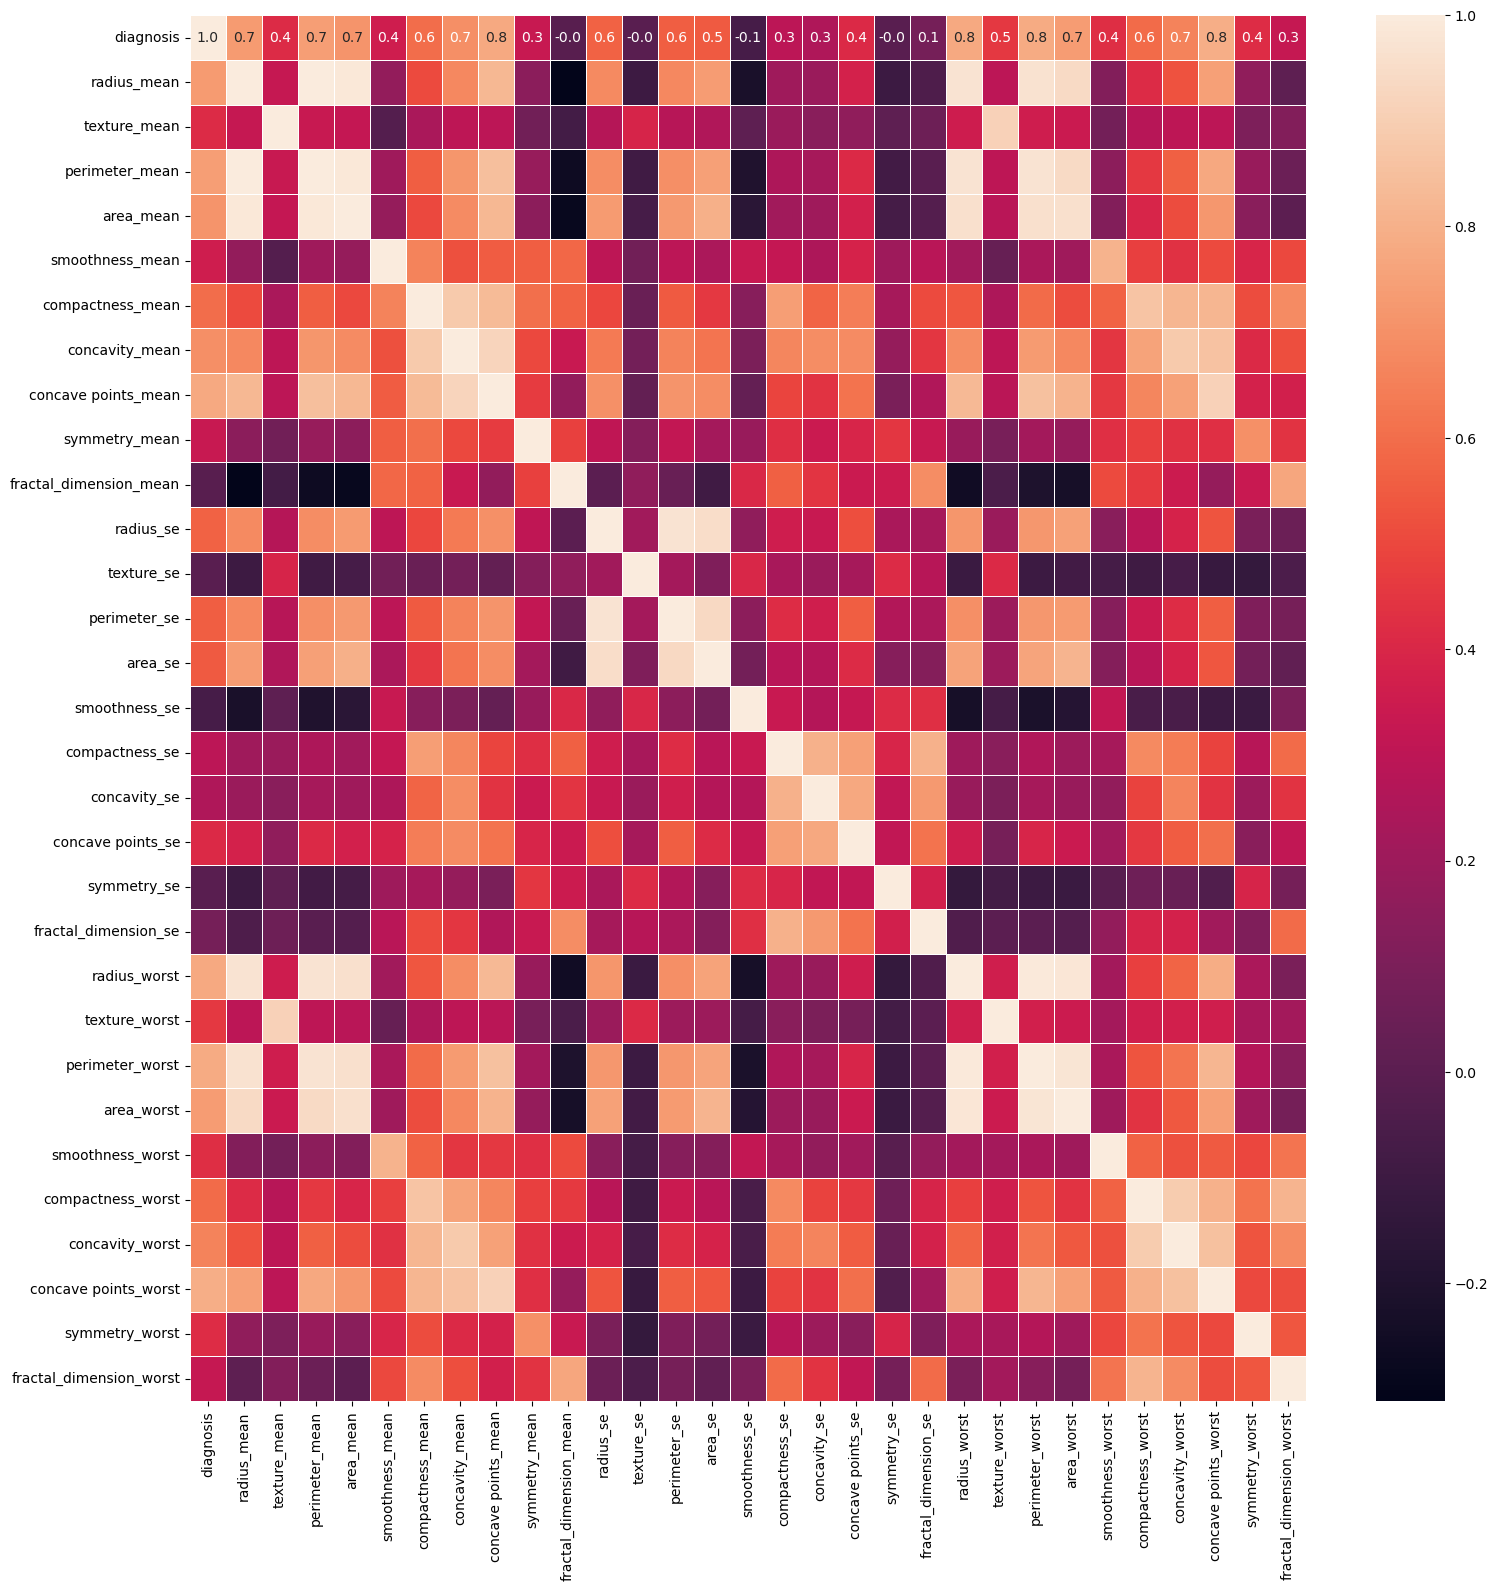

In [12]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

Все признаки делятся на три группы _mean, _se, _worst по 10 элементов - создадим список для каждого из них, они понадобятся в дальнейшем

In [13]:
first_10_features_list = df.columns[1:11]
second_10_features_list = df.columns[11:21]
third_10_features_list = df.columns[21:31]

In [14]:
print(first_10_features_list)
print(second_10_features_list)
print(third_10_features_list)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


выберем группу из первых 10 признаков и построим heatmap для нее

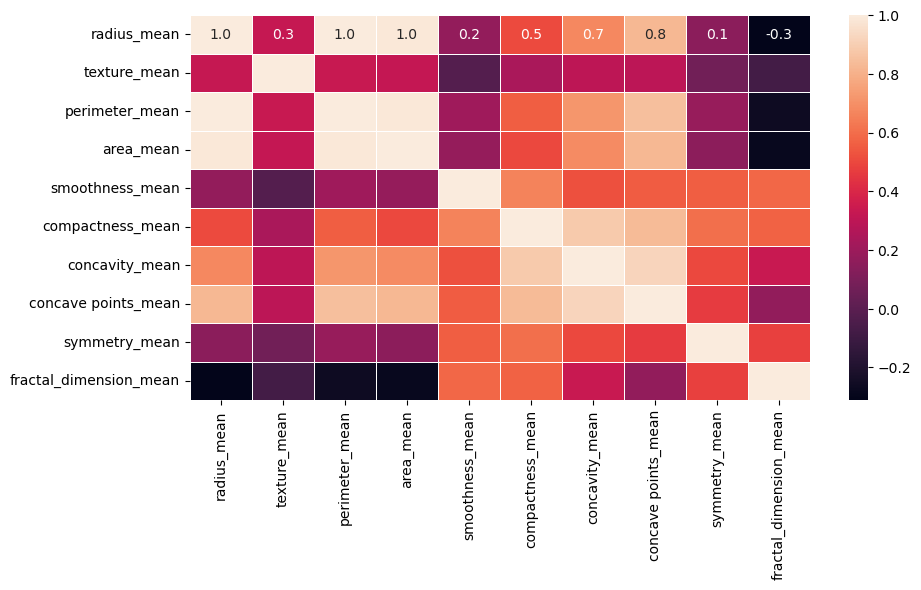

In [15]:
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df[first_10_features_list].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

Как видно на диаграмме, признаки radius_mean, perimeter_mean и area_mean сильно коррелируют друг с другом, поэтому, будем использовать только один из них, например, area_mean.

Аналогично, compactness_mean, concavity_mean and concave points_mean также скоррелированы, поэтому будем использовать, напрпимер, только concavity_mean.

Выберем второй десяток признаков и постороим heatmap

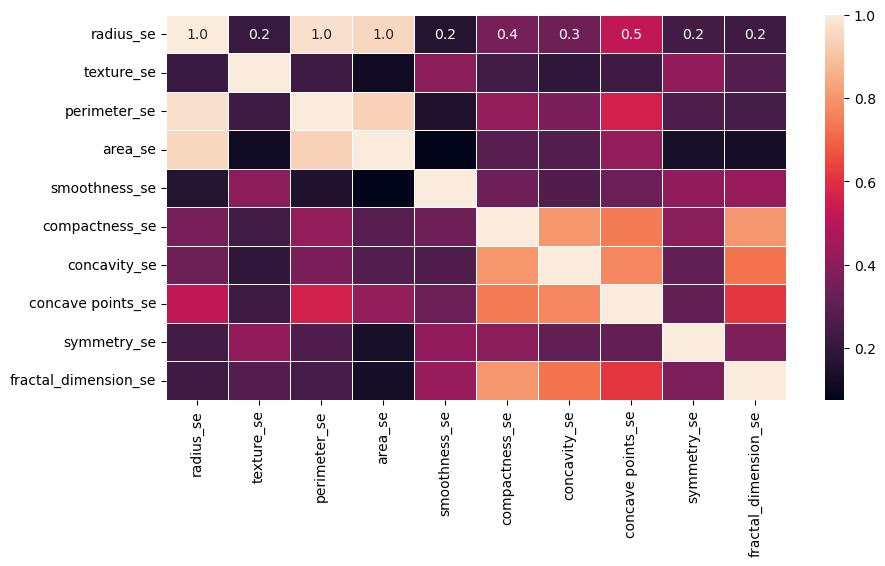

In [16]:
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df[second_10_features_list].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

Как видно на диаграмме, признаки radius_se, perimeter_se и area_se сильно коррелируют друг с другом, поэтому, будем использовать только один из них, например, area_se.

Аналогично, compactness_se, concavity_se and concave points_se также скоррелированы, поэтому будем использовать, напрпимер, только concavity_se.

Выберем третий десяток признаков и постоим heatmap

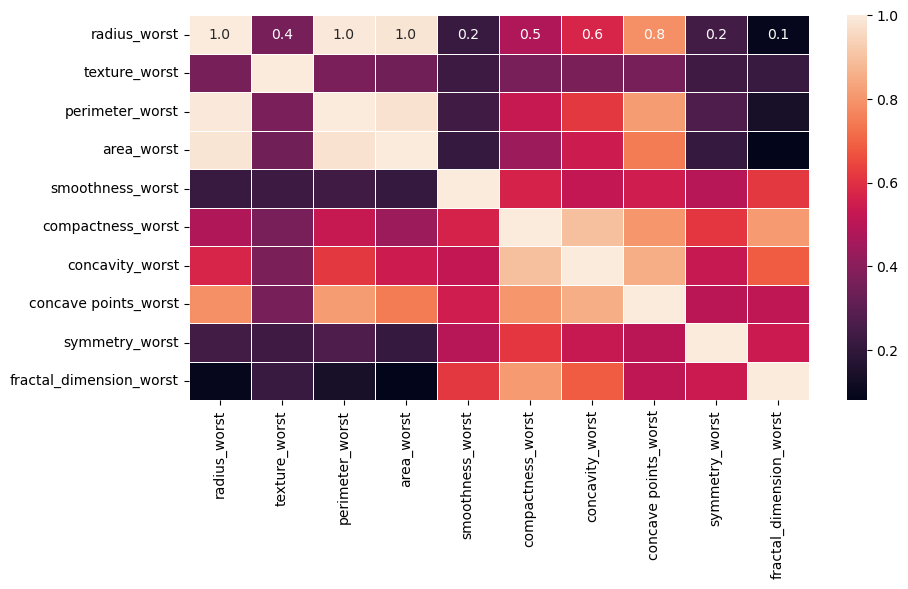

In [17]:
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df[third_10_features_list].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

Как видно на диаграмме, признаки radius_worst, perimeter_worst и area_worst сильно коррелируют друг с другом, поэтому, будем использовать только один из них, например, area_worst.

Аналогично, compactness_worst, concavity_worst and concave points_worst также скоррелированы, поэтому будем использовать, напрпимер, только concavity_worst.


Итого, мы выбрали скоррелированные признаки и теперь исключим их из датасета, а точнее, создадим новый без избыточных признаков

In [18]:
# список скоррелированных признаков
drop_list = ['radius_mean','perimeter_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','compactness_se','concave points_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst']
drop_list

['radius_mean',
 'perimeter_mean',
 'compactness_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'compactness_se',
 'concave points_se',
 'radius_worst',
 'perimeter_worst',
 'compactness_worst',
 'concave points_worst']

In [19]:
X = df.drop(drop_list, axis = 1)       # X содержит нескоррелированные признаки
X = X.drop('diagnosis', axis=1)        # исключаем из X целевую переменную
X.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,
842302,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,17.33,2019.0,0.1622,0.7119,0.4601,0.11890
842517,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,23.41,1956.0,0.1238,0.2416,0.2750,0.08902
84300903,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,25.53,1709.0,0.1444,0.4504,0.3613,0.08758
84348301,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,26.50,567.7,0.2098,0.6869,0.6638,0.17300
84358402,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,16.67,1575.0,0.1374,0.4000,0.2364,0.07678


In [20]:
X.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

5. Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?

In [21]:
# Объединим скоррелированные признаки в группы (3 x 2 = 6 групп) и построим попарные scatterplot-ы для каждой группы
mean_group1_cor_list = ['radius_mean', 'perimeter_mean', 'area_mean']
mean_group2_cor_list = ['compactness_mean', 'concavity_mean', 'concave points_mean']
se_group1_cor_list = ['radius_se', 'perimeter_se', 'area_se']
se_group2_cor_list = ['compactness_se', 'concavity_se', 'concave points_se']
worst_group1_cor_list = ['radius_worst', 'perimeter_worst', 'area_worst']
worst_group2_cor_list = ['compactness_worst', 'concavity_worst', 'concave points_worst']

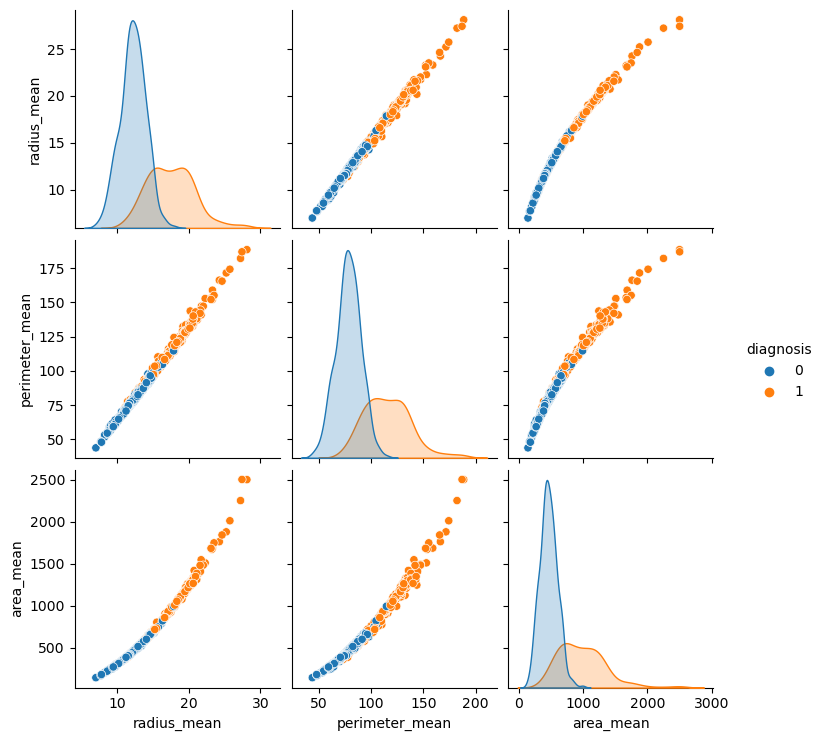

In [22]:
#sns.pairplot(data=df[mean_group1_cor_list])
sns.pairplot(data=df, hue='diagnosis', vars=mean_group1_cor_list)
plt.show;

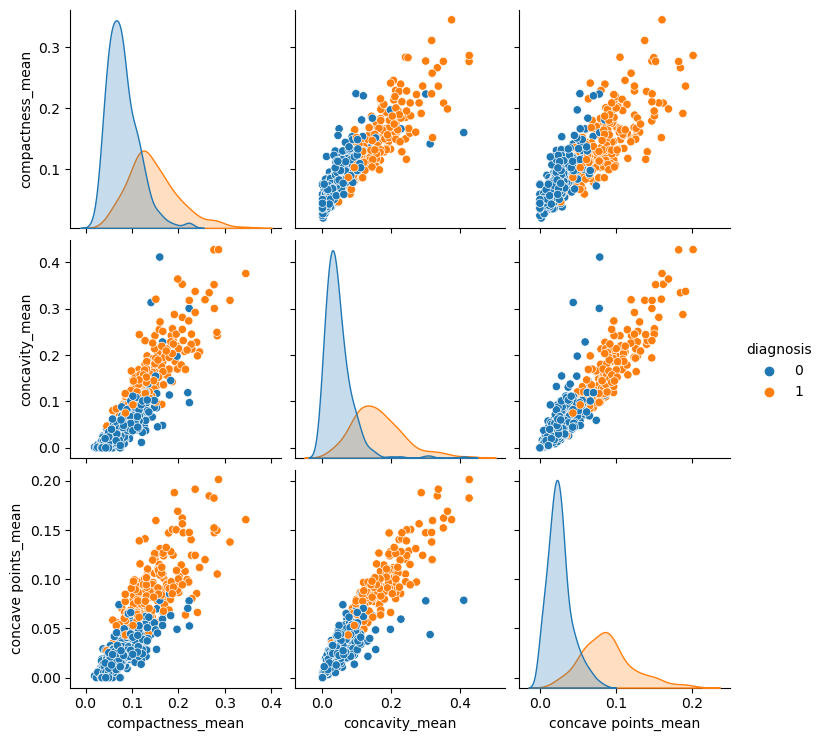

In [23]:
#sns.pairplot(data=df[mean_group2_cor_list])
sns.pairplot(data=df, hue='diagnosis', vars=mean_group2_cor_list)
plt.show;

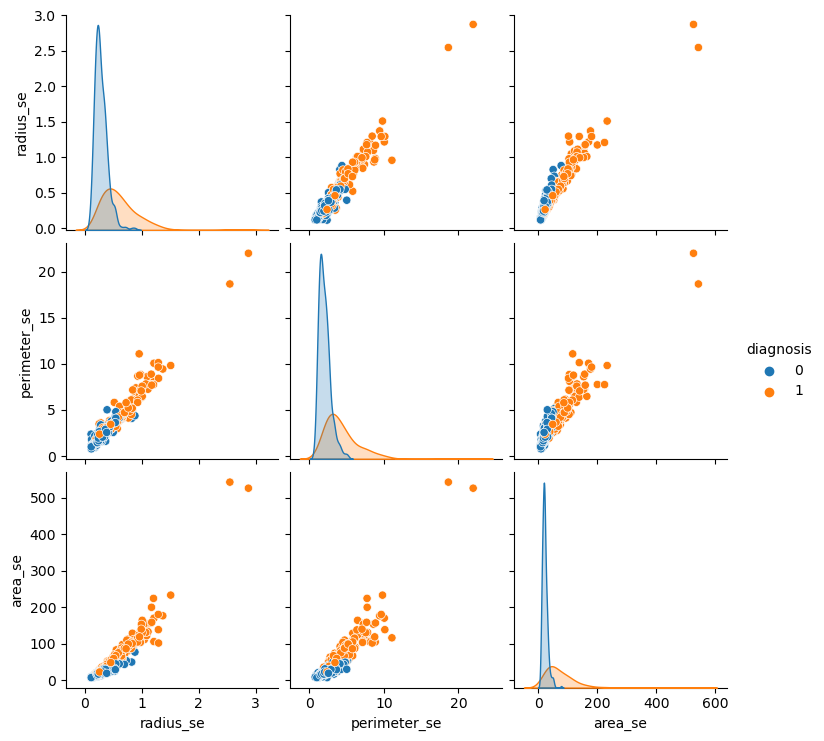

In [24]:
#sns.pairplot(data=df[se_group1_cor_list])
sns.pairplot(data=df, hue='diagnosis', vars=se_group1_cor_list)
plt.show;

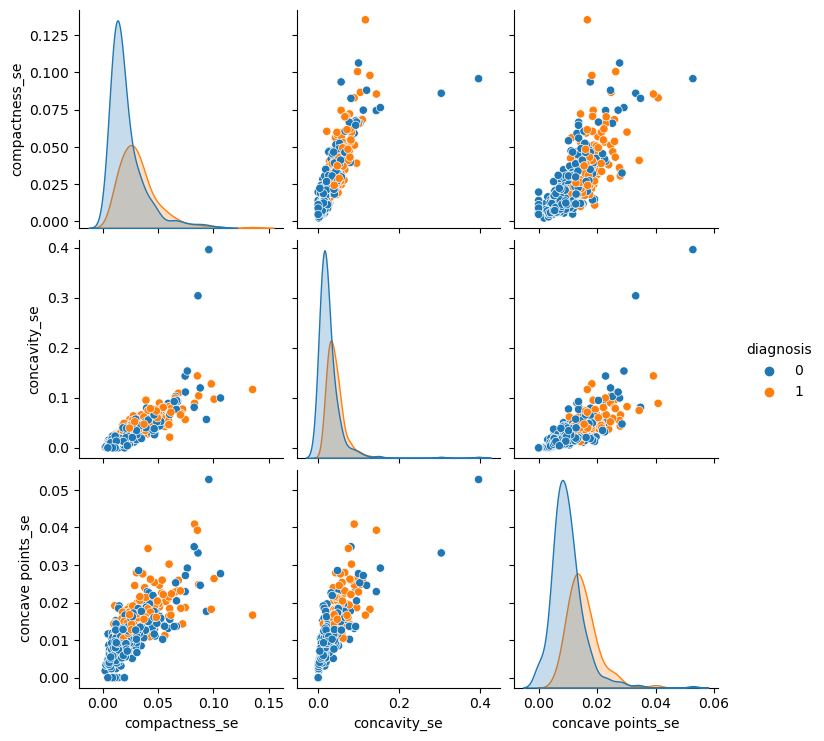

In [25]:
#sns.pairplot(data=df[se_group2_cor_list])
sns.pairplot(data=df, hue='diagnosis', vars=se_group2_cor_list)
plt.show;

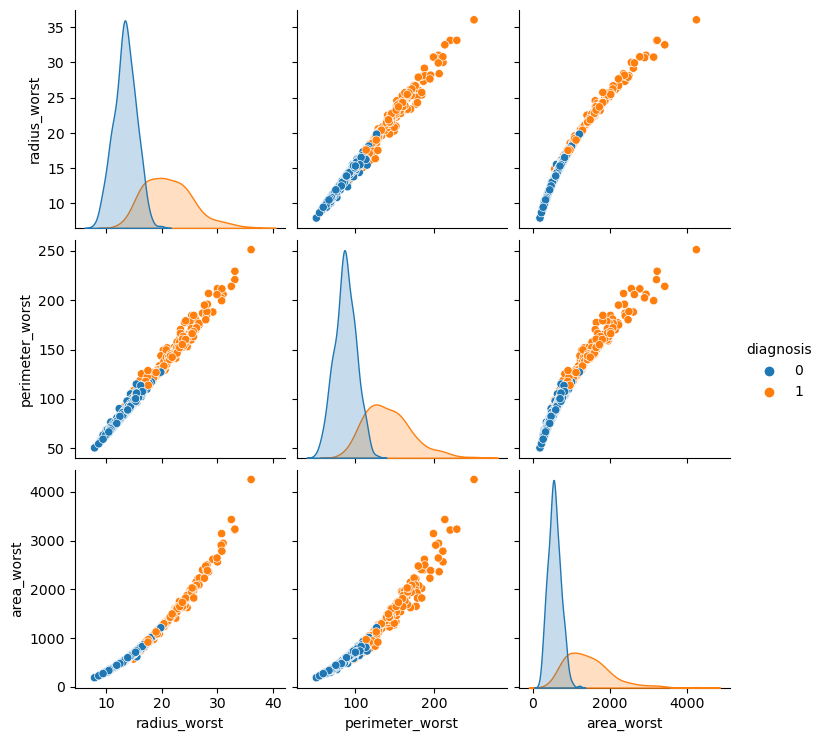

In [26]:
#sns.pairplot(data=df[worst_group1_cor_list])
sns.pairplot(data=df, hue='diagnosis', vars=worst_group1_cor_list)
plt.show;

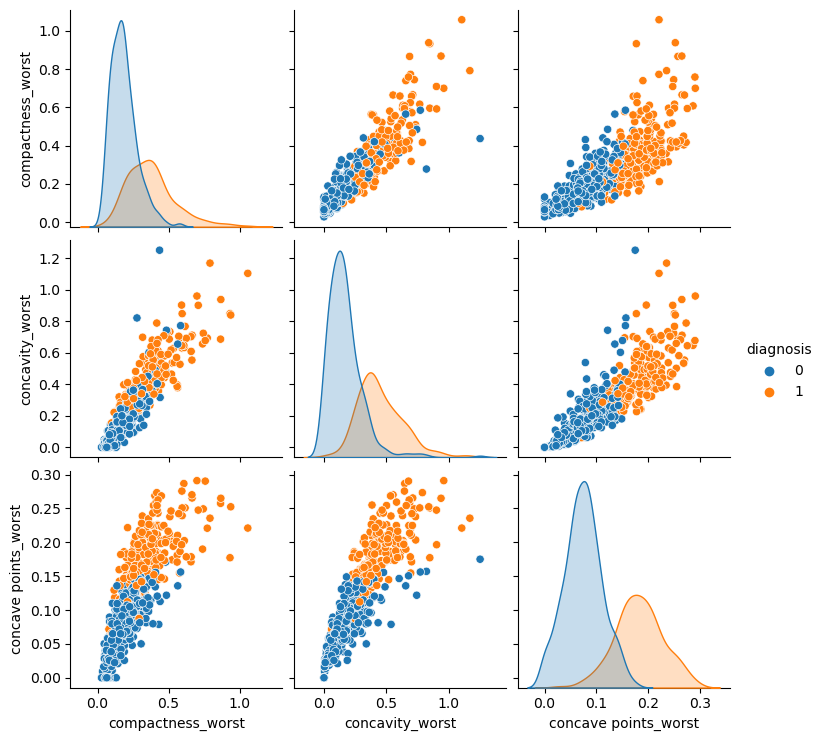

In [27]:
#sns.pairplot(data=df[worst_group2_cor_list])
sns.pairplot(data=df, hue='diagnosis', vars=worst_group2_cor_list)
plt.show;

На диаграммах видна практически линейная зависимость, соответственно, выбор коррелирующих признаков на основе heatmap был верным

6. Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

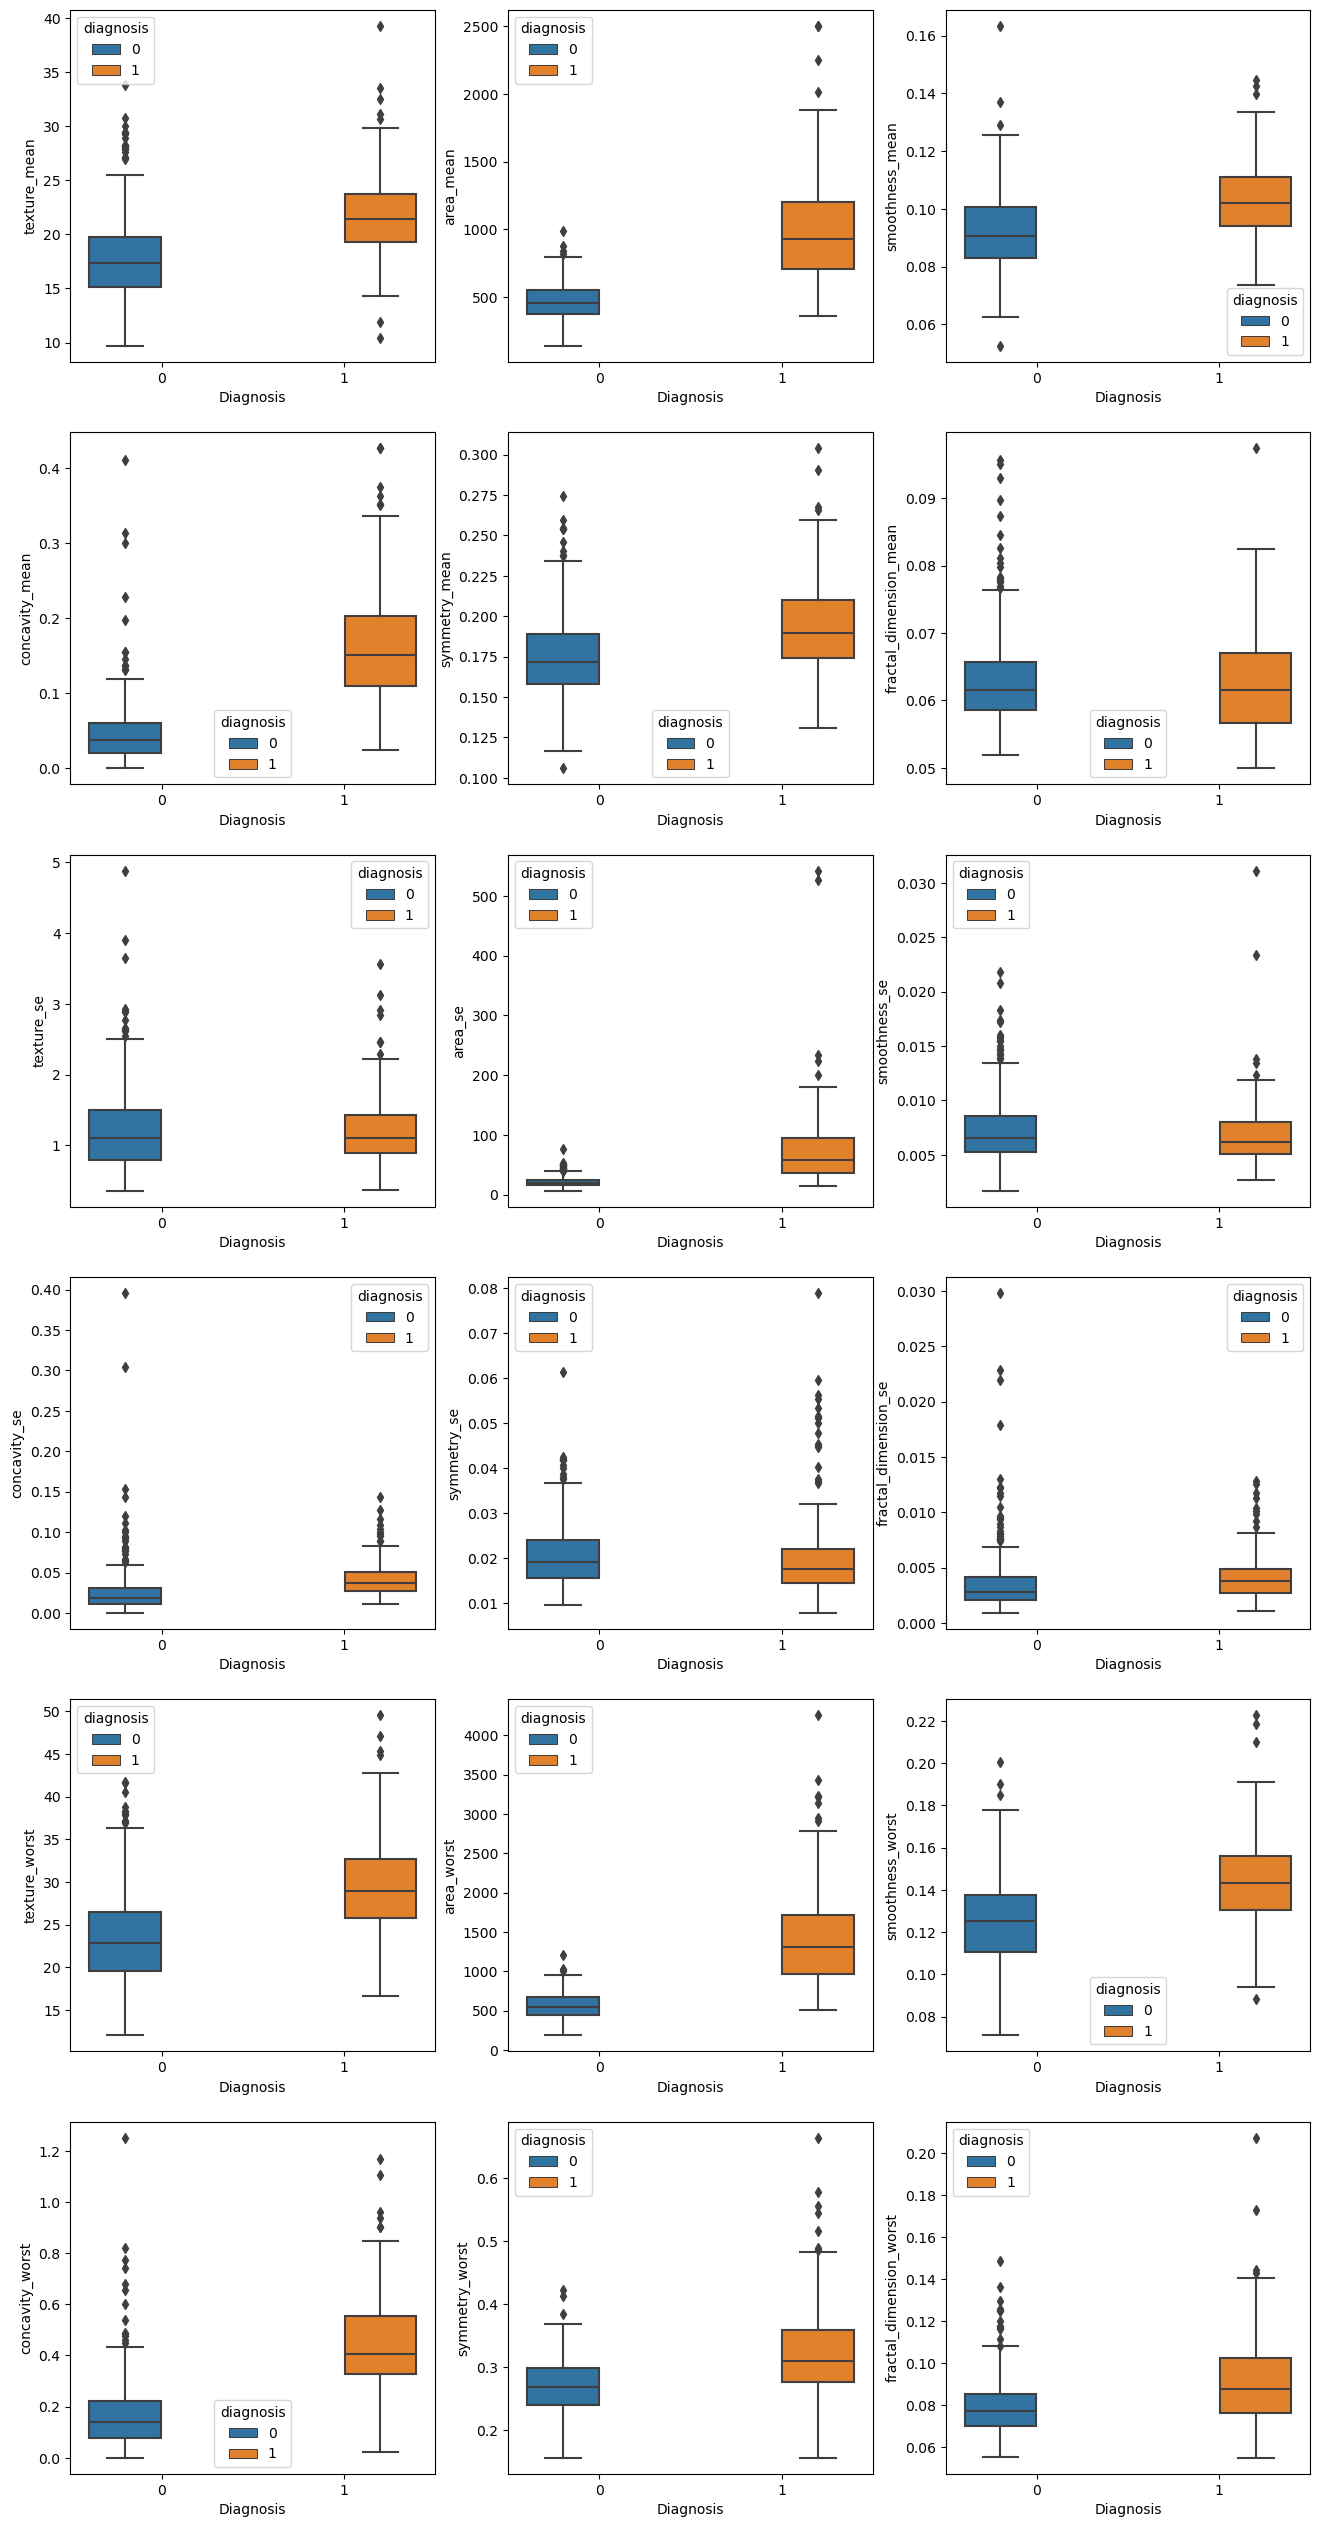

In [28]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16, 32))

for idx, feat in  enumerate(list(X.columns)):
    sns.boxplot(x='diagnosis', y=feat, hue='diagnosis', data=df, ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].set_xlabel('Diagnosis')
    axes[idx // 3, idx % 3].set_ylabel(feat);

На глаз наибольшее разделение мы видим для следующих признаков:
- texture_mean 
- area_mean 
- concavity_mean 
- area_se 
- area_worst
- concavity_worst

соответственно, они являются первыми кандидатами для прогнозирования целевой переменной

## Часть 2. Моделирование при помощи kNN
1. Разбейте данные на train-test, отложив 30% выборки для тестирования.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,
842302,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,17.33,2019.0,0.1622,0.7119,0.4601,0.11890
842517,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,23.41,1956.0,0.1238,0.2416,0.2750,0.08902
84300903,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,25.53,1709.0,0.1444,0.4504,0.3613,0.08758
84348301,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,26.50,567.7,0.2098,0.6869,0.6638,0.17300
84358402,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,16.67,1575.0,0.1374,0.4000,0.2364,0.07678


In [31]:
y = df.diagnosis

In [32]:
y.head()

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
Name: diagnosis, dtype: int64

Поскольку значения целевой переменной распределены неравномерно, то при вызове функции разделения данных передадим параметр stratify для сохраниения распределения целевой переменной в обучающей и тестовой выборках

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=df['diagnosis'])

In [34]:
type(X_train)

pandas.core.frame.DataFrame

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((398, 18), (171, 18), (398,), (171,))

Проверим соответствие распределения целевой переменной в обучающей и тестовой выборке

In [36]:
y.value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [37]:
y_train.value_counts(normalize=True)

diagnosis
0    0.628141
1    0.371859
Name: proportion, dtype: float64

In [38]:
y_test.value_counts(normalize=True)

diagnosis
0    0.625731
1    0.374269
Name: proportion, dtype: float64

Как мы видим, распределения идентичны.

2. Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

Значения различных атрибутов набора данных отличаются на порядки, поэтому необходима стандартизация данных, например, применим z-масштабирование $$ z = \frac{x - \mu}{\sigma}$$

Можно использовать StadardScaler из модуля sklearn.preprocessing

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
# X_train_scaled_sk = scaler.fit_transform(X_train)
# X_test_scaled_sk = scaler.transform(X_test)

Но мы посчитаем сами ))

In [42]:
X_train_scaled = (X_train - X_train.mean())/X_train.std(ddof=0)
X_test_scaled = (X_test - X_test.mean())/X_test.std(ddof=0)

Проверим

In [43]:
X_train_scaled.describe()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,3.168878e-16,1.562123e-16,8.792520e-16,-1.115802e-16,-8.703256e-17,6.337756e-16,-5.355850e-17,1.673703e-16,9.819058e-17,-1.026538e-16,-8.926416e-18,-8.033775e-17,-2.454764e-16,-5.467430e-17,-1.001990e-15,5.355850e-17,-1.874547e-16,2.231604e-17
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-2.329741e+00,-1.444889e+00,-3.057109e+00,-1.094412e+00,-2.239963e+00,-1.825578e+00,-1.689625e+00,-7.839140e-01,-1.443067e+00,-9.912273e-01,-1.602506e+00,-1.054953e+00,-2.283402e+00,-1.203628e+00,-2.199100e+00,-1.294309e+00,-2.228902e+00,-1.611168e+00
25%,-7.057776e-01,-6.689369e-01,-7.379913e-01,-7.504040e-01,-7.431653e-01,-7.095115e-01,-7.422742e-01,-5.235132e-01,-6.547080e-01,-5.398912e-01,-6.733468e-01,-5.555350e-01,-7.690877e-01,-6.363400e-01,-7.169528e-01,-7.877386e-01,-6.728650e-01,-6.746664e-01
50%,-9.436022e-02,-3.043533e-01,-3.186937e-02,-3.346746e-01,-8.140369e-02,-1.608527e-01,-1.970125e-01,-3.652410e-01,-2.178575e-01,-2.028469e-01,-2.108662e-01,-2.189741e-01,-4.158218e-02,-3.494761e-01,-4.071667e-02,-2.282939e-01,-1.302342e-01,-2.209896e-01
75%,5.839119e-01,4.064112e-01,6.538282e-01,5.511078e-01,5.407260e-01,4.596163e-01,5.499970e-01,1.478178e-01,4.157330e-01,2.533874e-01,4.061986e-01,2.596601e-01,6.708888e-01,4.030178e-01,5.722898e-01,5.101636e-01,4.652556e-01,4.582006e-01
max,3.203404e+00,5.229588e+00,4.677588e+00,4.093386e+00,4.488254e+00,4.892751e+00,4.915004e+00,1.183539e+01,8.456545e+00,1.132430e+01,7.439465e+00,9.462535e+00,3.586758e+00,5.830828e+00,3.860234e+00,4.642751e+00,6.150903e+00,6.893911e+00


$ \mu \approx 0, \sigma \approx 1 $ - вроде то что надо )

3. Постройте модель kNN "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(accuracy, precision, recall, f1))

Если строить модель "из коробки" и без настройки параметров, то возьмем k=2

In [54]:
k=2

Для начала обучим модель и посчитаем метрики на ненормализованных данных

In [55]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
quality(y_pred, y_test)

Accuracy:  0.901
Precision: 0.766
Recall:    0.961
F1-score:  0.852


Сравним с результатами обучения модели после нормализации

In [56]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
y_pred_norm = knn.predict(X_test_scaled)
quality(y_pred_norm, y_test)

Accuracy:  0.942
Precision: 0.875
Recall:    0.966
F1-score:  0.918


Результаты говорят сами за себя )

Построим ROC-кривую для ненормализованных данных

In [57]:
import sklearn.metrics as metrics

# calculate the fpr and tpr
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

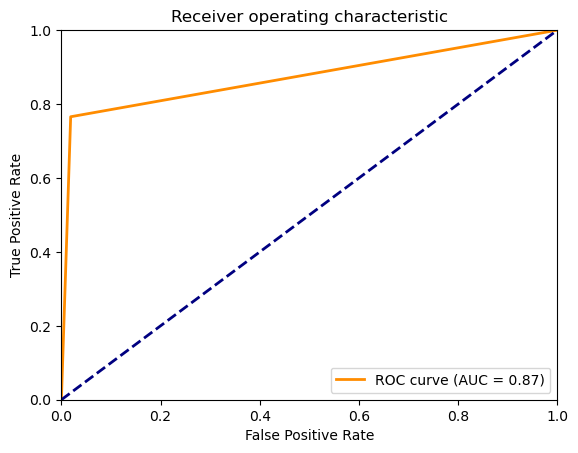

In [58]:
plt.figure()
lw = 2  # line width
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (AUC = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Если строить график не требуется, то AUС можно посчитать проще

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
roc_auc_score(y_test, y_pred)

0.8734667056074766

Сравним с ROC-кривой для нормализованных данных

In [61]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_norm)
roc_auc = metrics.auc(fpr, tpr)

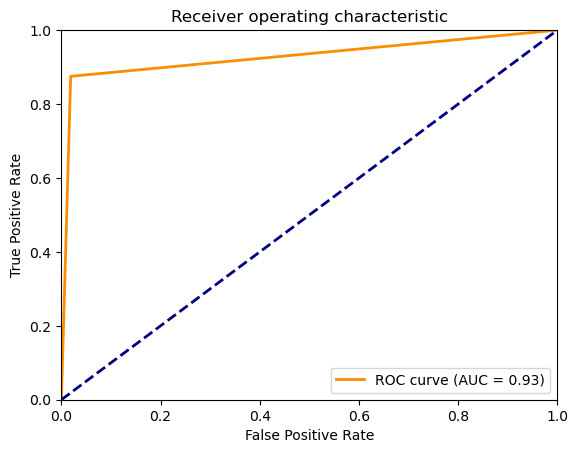

In [62]:
plt.figure()
lw = 2  # line width
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (AUC = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [63]:
roc_auc_score(y_test, y_pred_norm)

0.9281542056074766

4. Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)

Сравним два подхода к настройке параметра числа соседей: 
1. перебор диапазона значений (с выбором максимальной метрики accuracy)
2. кросс-валидация

Вариант 1 - сравнение метрик при изменении k в диапазоне значений

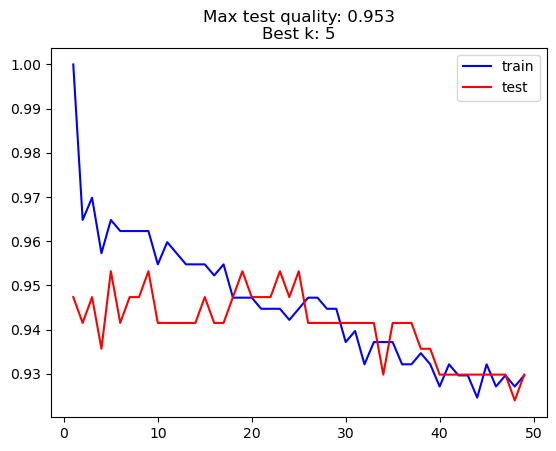

In [66]:
neighbors = range(1, 50)
accuracy_train = []
accuracy_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds_train = knn.predict(X_train_scaled)
    preds_test = knn.predict(X_test_scaled)
    accuracy_train.append(accuracy_score(preds_train, y_train))
    accuracy_test.append(accuracy_score(preds_test, y_test))
    
plt.plot(neighbors, accuracy_train, color='blue', label='train')
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(accuracy_test), np.argmax(accuracy_test)+1))
plt.legend()
plt.show()

Посчитаем метрики для k=5

In [67]:
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
y_pred_norm = knn.predict(X_test_scaled)
quality(y_pred_norm, y_test)

Accuracy:  0.953
Precision: 0.906
Recall:    0.967
F1-score:  0.935


Нам удалось увеличить accuracy c 0.942 до 0.953 (+ 0.011)

Вариант 2 - GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
%%time
n_folds = 5
# параметр p отвечает за выбор метрики расстояния
param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=n_folds, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 

test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

print(quality(test_predictions, y_test))
print(f'best estimator -> {grid_search.best_estimator_.p}')

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best CV score: 0.943, best CV k: 13
Resulting test score: 0.918
Accuracy:  0.942
Precision: 0.875
Recall:    0.966
F1-score:  0.918
None
best estimator -> 1
CPU times: user 41.4 s, sys: 1.34 s, total: 42.7 s
Wall time: 10.9 s


Результаты неплохие, но хуже, чем вариант с k=5 после нормализации данных, возможно, я что-то делаю не так...

Понял в чем дело, набор данных небольшой и делить его на 5 фолдов для кросс-валидации перебор - результаты тем лучше, чем меньше фолдов 

In [70]:
n_folds = 2

In [72]:
%%time

# параметр p отвечает за выбор метрики расстояния
param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=n_folds, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 

test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

print(quality(test_predictions, y_test))
print(f'best estimator: p -> {grid_search.best_estimator_.p}')
print(f'best estimator: k -> {grid_search.best_estimator_.n_neighbors}')

Fitting 2 folds for each of 147 candidates, totalling 294 fits
Best CV score: 0.944, best CV k: 3
Resulting test score: 0.952
Accuracy:  0.965
Precision: 0.938
Recall:    0.968
F1-score:  0.952
None
best estimator: p -> 1
best estimator: k -> 3
CPU times: user 26.8 s, sys: 836 ms, total: 27.6 s
Wall time: 7.11 s


Видим, что все метрики улучшились ! 

   
Бонусное задание для любопытствующих, к которому можно вернуться после изучения логистической регрессии:
    Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85.
    Постройте модель логистической регрессии "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.
    Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :)
    Какая из двух настроенных моделей, kNN или логистическая регрессия оказалась, в итоге, лучше?

